In [1]:
import requests
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

from bs4 import BeautifulSoup      
from nltk.corpus import stopwords
import regex as re

from textblob import TextBlob, Word
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer

In [20]:
def clean_text(raw_text, return_base='none'):
    text = re.sub(r'https:[^\s]+', repl='', string=raw_text)
    text = re.sub(r'http:[^\s]+', repl='', string=text)
    text = BeautifulSoup(text, 'lxml').get_text() 
    text = text.lower()
    words = re.sub("[^a-zA-Z]", " ", text)
    if return_base == 'lem':
        words = [lemmatizer.lemmatize(w) for w in words]
        return(" ".join(words))
    if return_base == 'stem':
        words = [p_stemmer.stem(w) for w in words]
        return(" ".join(words))
    return(words)

In [22]:
lemmatizer=WordNetLemmatizer()
p_stemmer = PorterStemmer()

In [3]:
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

Analyzing sentiment of comments containing "McCain"

In [25]:
mccain_data = pd.read_csv('./datasets/mccain_data.csv')
mccain_data.shape

(64189, 5)

In [26]:
mccain_data['date'] = pd.to_datetime(mccain_data['date'])
mccain_data.set_index('date', inplace=True)

In [27]:
mccain_data.head()

,author,body,score,subreddit
date,,,,
2019-01-01,havoc2bg,Not the first time McCain peddled foreign prop...,1,The_Donald
2019-01-01,bhoelscher,Fucking McCain,1,The_Donald
2019-01-01,armorkingII,He didn't sell out. He always was a Deep State...,1,The_Donald
2019-01-01,Bulldog65,"Such a two faced sack of crap, cut from the sa...",1,The_Donald
2019-01-01,armorkingII,I voted for this guy. I voted for McCain. No l...,1,The_Donald


In [28]:
mccain_data.body = mccain_data.body.apply(clean_text)
mccain_data['sentiment'] = mccain_data.body.map(detect_sentiment)

In [29]:
mccain_data.head()

,author,body,score,subreddit,sentiment
date,,,,,
2019-01-01,havoc2bg,not the first time mccain peddled foreign prop...,1,The_Donald,0.008333
2019-01-01,bhoelscher,fucking mccain,1,The_Donald,-0.600000
2019-01-01,armorkingII,he didn t sell out he always was a deep state...,1,The_Donald,0.000000
2019-01-01,Bulldog65,such a two faced sack of crap cut from the sa...,1,The_Donald,0.095833
2019-01-01,armorkingII,i voted for this guy i voted for mccain no l...,1,The_Donald,-0.500000


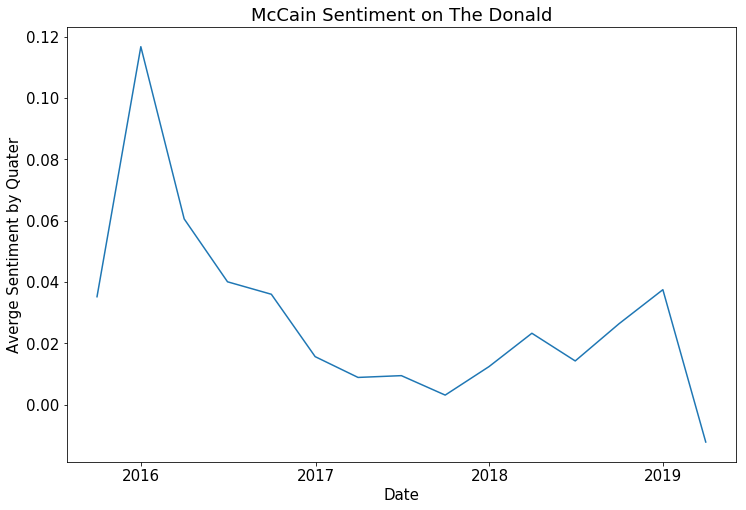

In [30]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(12,8))
plt.title('McCain Sentiment on The Donald')
plt.rcParams.update({'font.size': 12})
plt.ylabel('Averge Sentiment by Quater')
plt.xlabel('Date')
plt.plot(mccain_data.resample('Q')['sentiment'].mean())
plt.xticks([dt.date(2016, 1, 1), dt.date(2017, 1, 1), dt.date(2018, 1, 1), dt.date(2019, 1, 1)], 
           labels=['2016', '2017', '2018', '2019']);


---

Analyzing frequency of Orange Man Bad on The Donald

In [31]:
orange_data = pd.read_csv('./datasets/orange_man_bad_data.csv')
orange_data.shape

(6706, 5)

In [32]:
orange_data['date'] = pd.to_datetime(orange_data['date'])
orange_data.set_index('date', inplace=True)

In [33]:
orange_data['count'] = 1
orange_data.head()

,author,body,score,subreddit,count
date,,,,,
2019-01-01,BoomerMaxwell,Orange man still bad for eating kfc!,1,The_Donald,1
2019-01-02,Fishyman908,Kim: Hey Trump last meeting was great. Can we ...,1,The_Donald,1
2019-01-02,HillarysRussianBot,But but but Trump is a racist and... And slave...,1,The_Donald,1
2019-01-02,ziggyzona,Assange is the founder of a journalist institu...,1,The_Donald,1
2019-01-02,god_emperor_jeb,The left/right dichotomy only serves the elite...,1,The_Donald,1


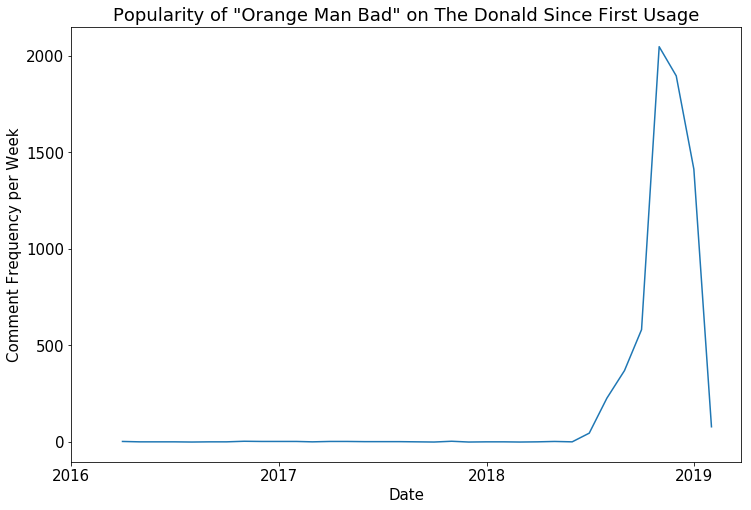

In [54]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(12,8))
plt.title('Popularity of "Orange Man Bad" on The Donald Since First Usage')
plt.rcParams.update({'font.size': 12})
plt.ylabel('Comment Frequency per Week')
plt.xlabel('Date')
plt.plot(orange_data.resample('M')['count'].sum())
plt.xticks([dt.date(2016, 1, 1), dt.date(2017, 1, 1), dt.date(2018, 1, 1), dt.date(2019, 1, 1)], 
           labels=['2016', '2017', '2018', '2019']);

Analyzing frequency of God Emperor on The Donald

In [35]:
god_data = pd.read_csv('./datasets/god_emperor_data.csv')
god_data.dropna(inplace=True)
god_data.shape

(57766, 5)

In [36]:
god_data['date'] = pd.to_datetime(god_data['date'])
god_data.set_index('date', inplace=True)

In [37]:
god_data['count'] = 1
god_data.head()

,author,body,score,subreddit,count
date,,,,,
2019-01-02,Taellyn,Right?! I was all packed and ready to go! Stil...,1,The_Donald,1
2019-01-02,ono412,Perhaps even a God Emperor?,1,The_Donald,1
2019-01-02,ShadowBanThisCucks,I wouldn't mind if there's a GOP primary. Then...,1,The_Donald,1
2019-01-02,TheComedianGLP,It's hard to hide your identity as Saviour of ...,1,The_Donald,1
2019-01-02,ConservativelyRight,They're already caving. Our God Emperor will m...,1,The_Donald,1


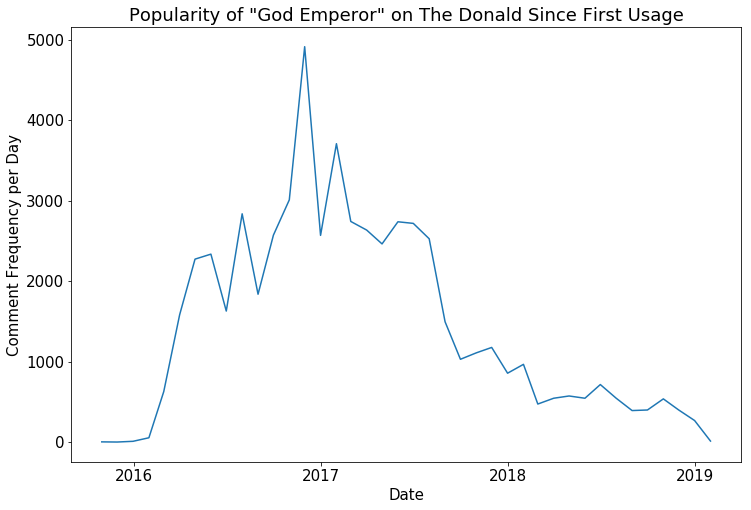

In [53]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(12,8))
plt.title('Popularity of "God Emperor" on The Donald Since First Usage')
plt.rcParams.update({'font.size': 12})
plt.ylabel('Comment Frequency per Day')
plt.xlabel('Date')
plt.plot(god_data.resample('M')['count'].sum())
plt.xticks([dt.date(2016, 1, 1), dt.date(2017, 1, 1), dt.date(2018, 1, 1), dt.date(2019, 1, 1)], 
           labels=['2016', '2017', '2018', '2019']);

Analyzing Build The Wall Frequency on The Donald

In [39]:
wall_data = pd.read_csv('./datasets/build_the_wall.csv')
wall_data.dropna(inplace=True)
wall_data.shape

(79886, 5)

In [40]:
wall_data['date'] = pd.to_datetime(wall_data['date'])
wall_data.set_index('date', inplace=True)

In [41]:
wall_data['count'] = 1
wall_data.head()

,author,body,score,subreddit,count
date,,,,,
2019-01-02,beerpuke,Mexico has been and will always be a pass thro...,1,The_Donald,1
2019-01-02,TrumpBrickBot,**FOR THE LOVE OF GOD GET THIS PATRIOT A BRICK...,1,The_Donald,1
2019-01-02,Catit50,Did BHO pay for his wall? Did the US tax payer...,1,The_Donald,1
2019-01-02,missionofpiece,"I return all the GOP ""surveys"" that are really...",1,The_Donald,1
2019-01-02,UsernameNeo,I want a build the wall camp and I want it now!,1,The_Donald,1


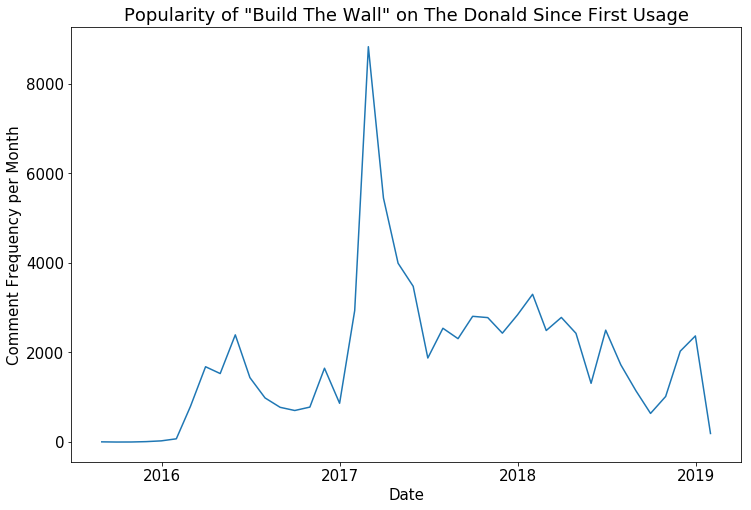

In [52]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(12,8))
plt.title('Popularity of "Build The Wall" on The Donald Since First Usage')
plt.rcParams.update({'font.size': 12})
plt.ylabel('Comment Frequency per Month')
plt.xlabel('Date')
plt.plot(wall_data.resample('M')['count'].sum())
plt.xticks([dt.date(2016, 1, 1), dt.date(2017, 1, 1), dt.date(2018, 1, 1), dt.date(2019, 1, 1)], 
           labels=['2016', '2017', '2018', '2019']);

What happened in early 2017 to cause that spike in usage?

In [46]:
# Turns out there is a large amount of obvious bot activity
wall_data.author.value_counts().head(10)

MAGABrickBot          43047
TrumpBrickBot          1038
TheWallGrows            750
[deleted]               363
TheWallGrowsTaller      316
540k                    261
jayce_is_king           241
TrumptraintoDC          123
THETRUMPTRUTHTRAIN       91
fastmandan               89
Name: author, dtype: int64

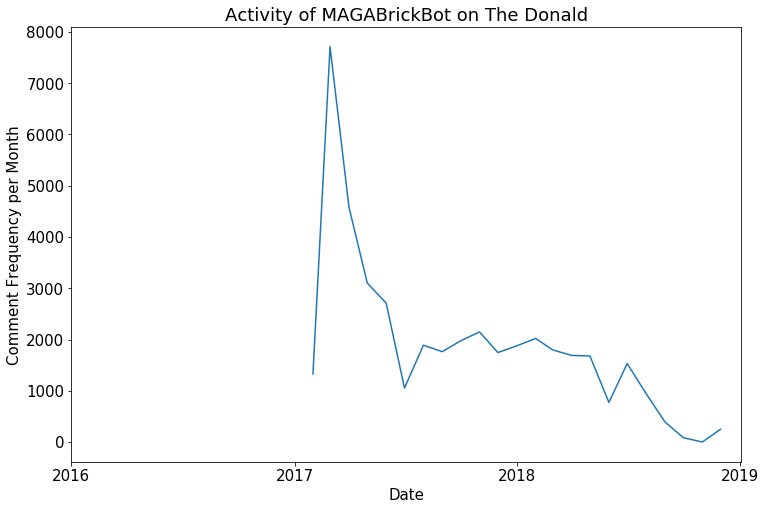

In [55]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(12,8))
plt.title('Activity of MAGABrickBot on The Donald')
plt.rcParams.update({'font.size': 12})
plt.ylabel('Comment Frequency per Month')
plt.xlabel('Date')
plt.plot(wall_data.loc[wall_data.author == 'MAGABrickBot'].resample('M')['count'].sum())
plt.xticks([dt.date(2016, 1, 1), dt.date(2017, 1, 1), dt.date(2018, 1, 1), dt.date(2019, 1, 1)], 
           labels=['2016', '2017', '2018', '2019']);

This clearly accounts for for the spike in "build the wall" frequency.

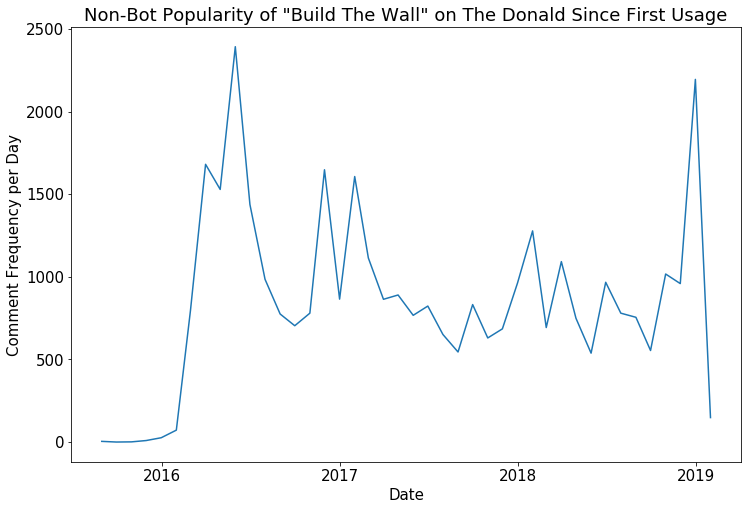

In [48]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(12,8))
plt.title('Non-Bot Popularity of "Build The Wall" on The Donald Since First Usage')
plt.rcParams.update({'font.size': 12})
plt.ylabel('Comment Frequency per Day')
plt.xlabel('Date')
plt.plot(wall_data.loc[(wall_data.author != 'MAGABrickBot') & \
                       (wall_data.author != 'TrumpBrickBot')].resample('M')['count'].sum())
plt.xticks([dt.date(2016, 1, 1), dt.date(2017, 1, 1), dt.date(2018, 1, 1), dt.date(2019, 1, 1)], 
           labels=['2016', '2017', '2018', '2019']);

This follows what we would expect from our intuition. The steep drop off in 2019 is artificial since only a couple of days in January have been captured with this scrape.